In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# checking the dtype of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [5]:
# checking the number of unique values per feature
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
# checking the value counts for each of the categorical features
for feature in data.columns:
    if data[feature].nunique() < 6:
        print(data[feature].value_counts())
        print('-' * 60)

gender
Male      3555
Female    3488
Name: count, dtype: int64
------------------------------------------------------------
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
------------------------------------------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
------------------------------------------------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
------------------------------------------------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
------------------------------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
------------------------------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
------------------------------------------------------------
OnlineSecurity
No                     3498
Yes     

In [7]:
# checking for missing values in the data
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# for each columns in the data, check for strings
for col in data.columns:
    if data[col].dtype == 'O':
        num_blanks = (data[col].str.strip() == '').sum()
        if num_blanks > 0:
            print(f' Columns {col} has {num_blanks} blank string(s)')

 Columns TotalCharges has 11 blank string(s)


In [9]:
# convert the blank strings to NaN values
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

# convert the feature datatype to float
data['TotalCharges'] = data['TotalCharges'].astype(float)

# filling the missing values in the data with the mean
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [10]:
# checking duplicated values in the data
data.duplicated().sum()

0

In [11]:
# dropping customerID
data.drop('customerID', axis=1, inplace=True)

# Exploratory Data Analysis

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
# defining the lists of categorical features
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O' and feature not in 'Churn']
print(categorical_features)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [14]:
# defining the lists of numerical features
numerical_features = [feature for feature in data.columns if feature not in categorical_features and feature not in 'Churn']
print(numerical_features)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


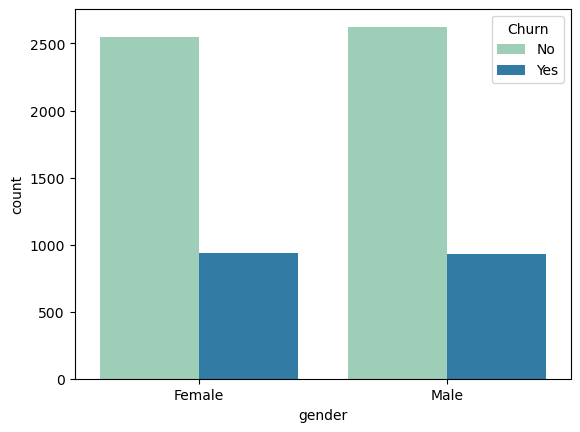

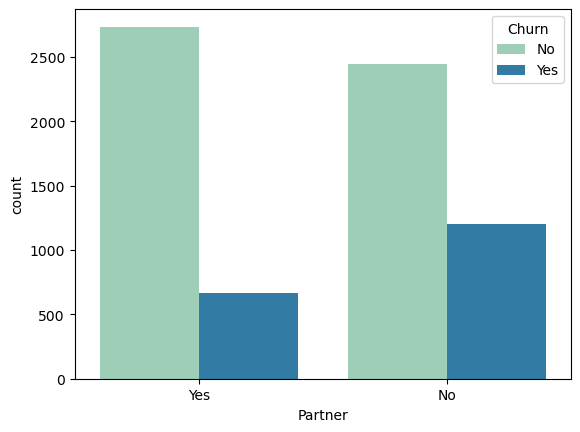

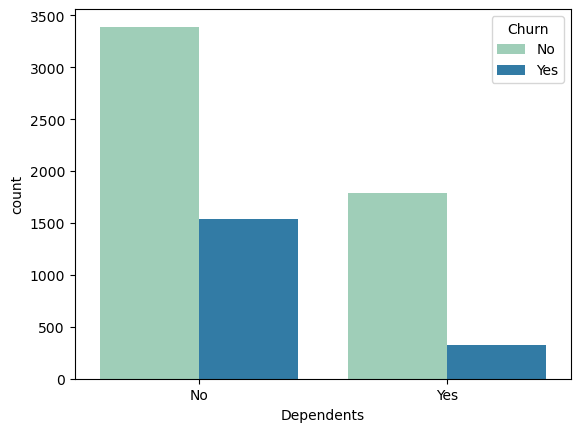

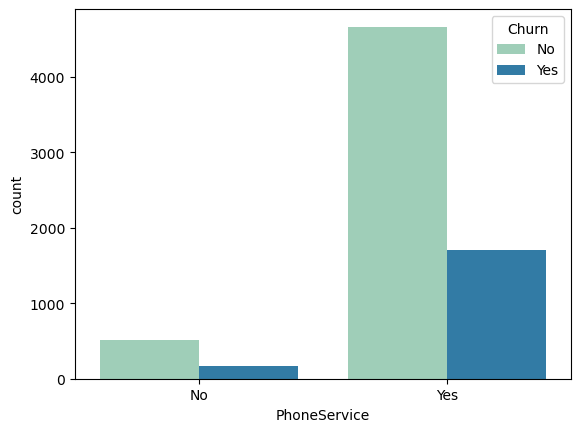

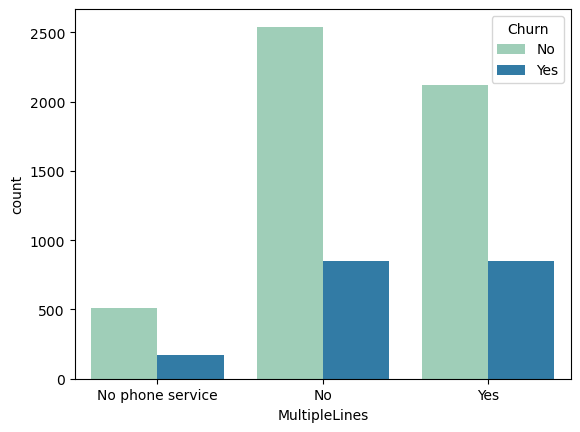

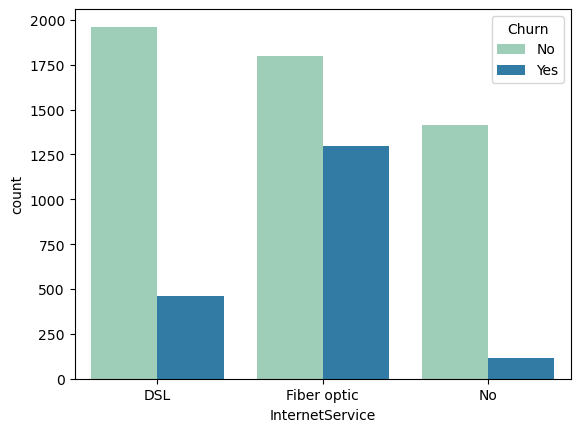

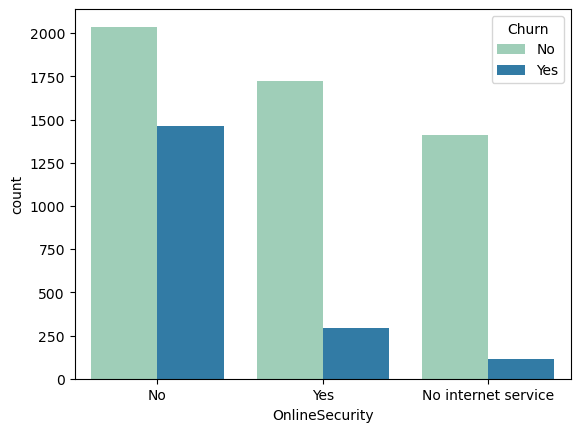

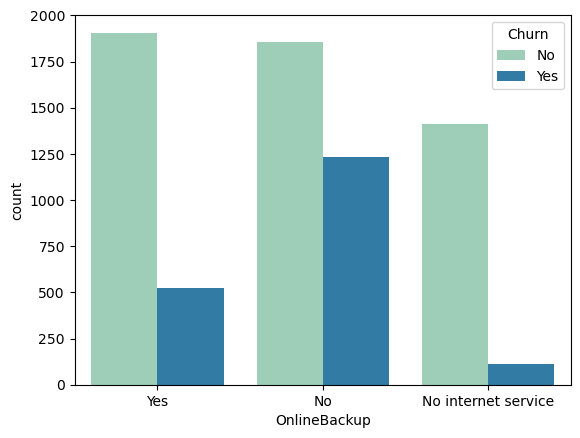

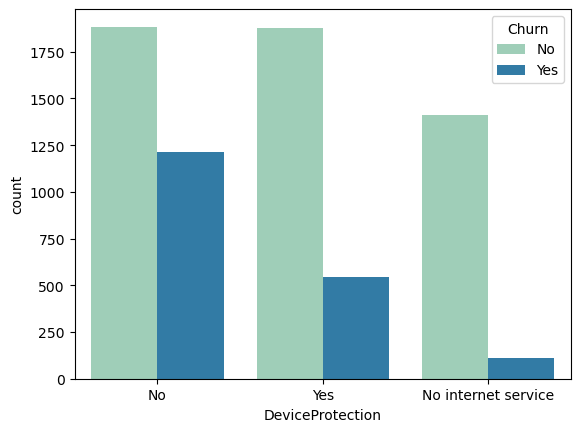

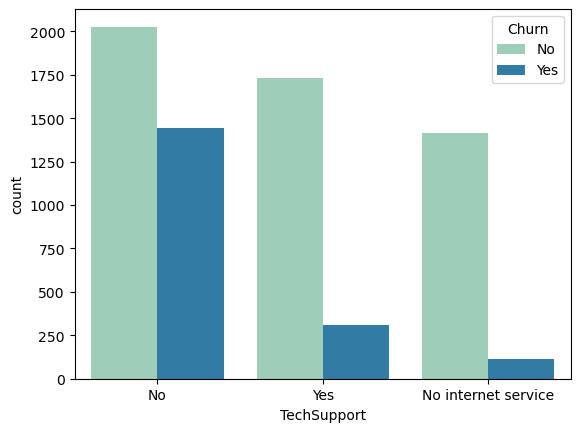

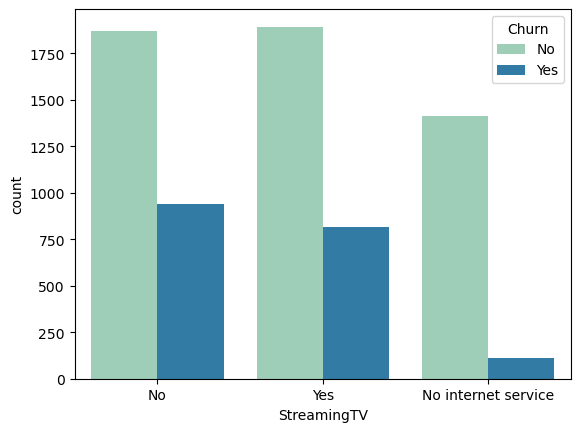

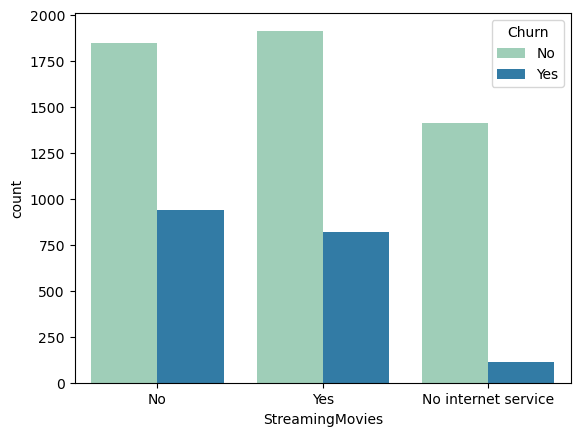

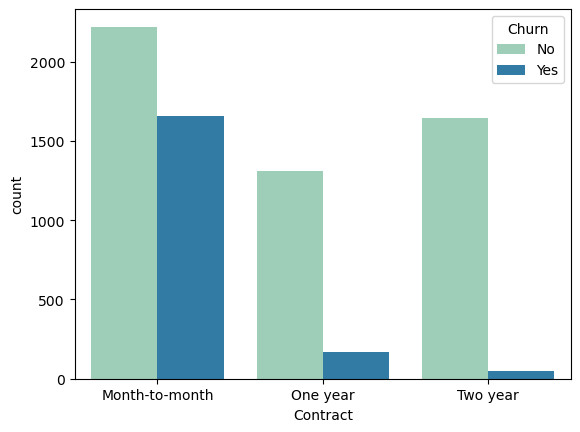

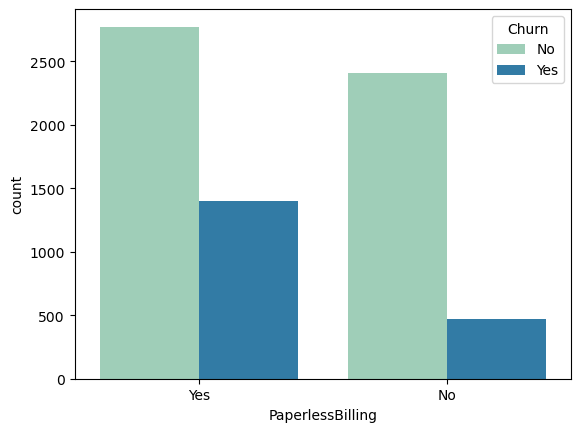

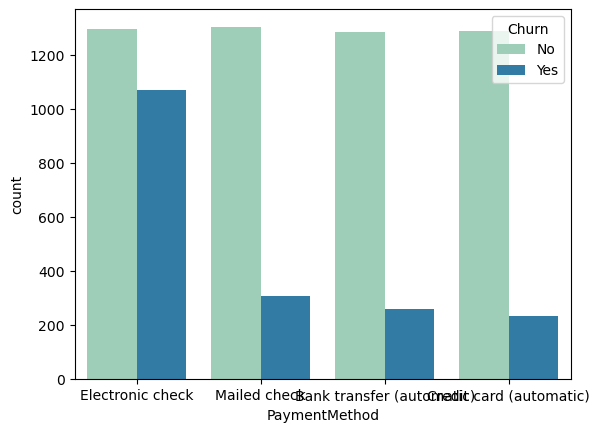

In [15]:
# plotting the categorical features vs the dependent feature
for feature in categorical_features:
    sns.countplot(x=feature, data=data, hue='Churn', palette='YlGnBu')
    plt.savefig(f'{feature} vs Churn.png', bbox_inches='tight')
    plt.show();

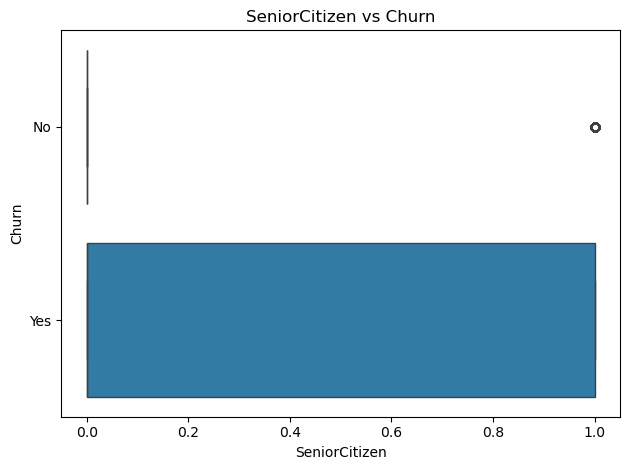

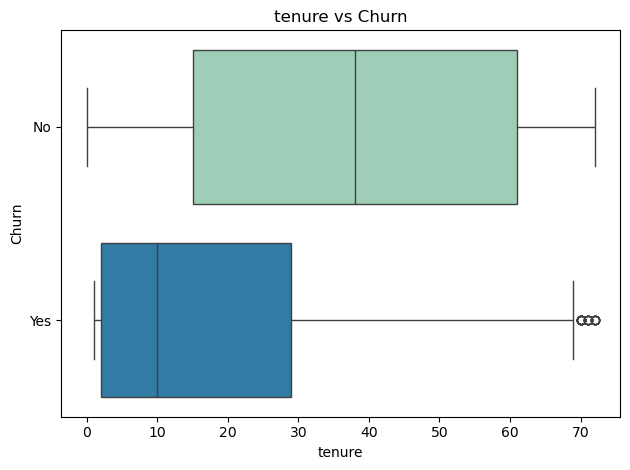

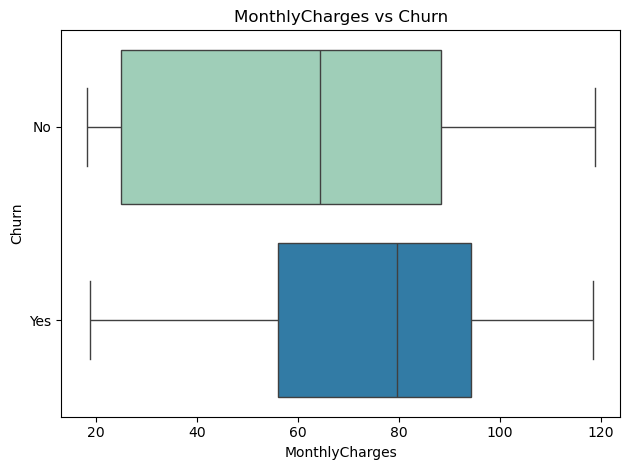

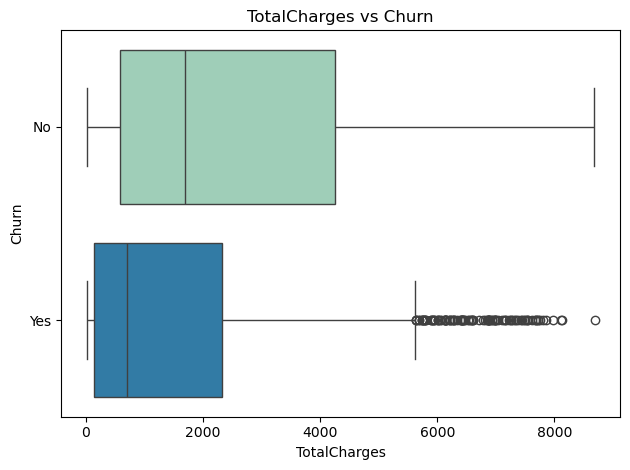

In [16]:
# plotting the numerical features vs the dependent feature
for feature in numerical_features:
    sns.boxplot(x=feature, data=data, y='Churn', palette='YlGnBu')
    plt.title(f'{feature} vs Churn')
    plt.tight_layout()
    plt.savefig(f'{feature} vs Churn_boxplot.png', bbox_inches='tight')
    plt.show();

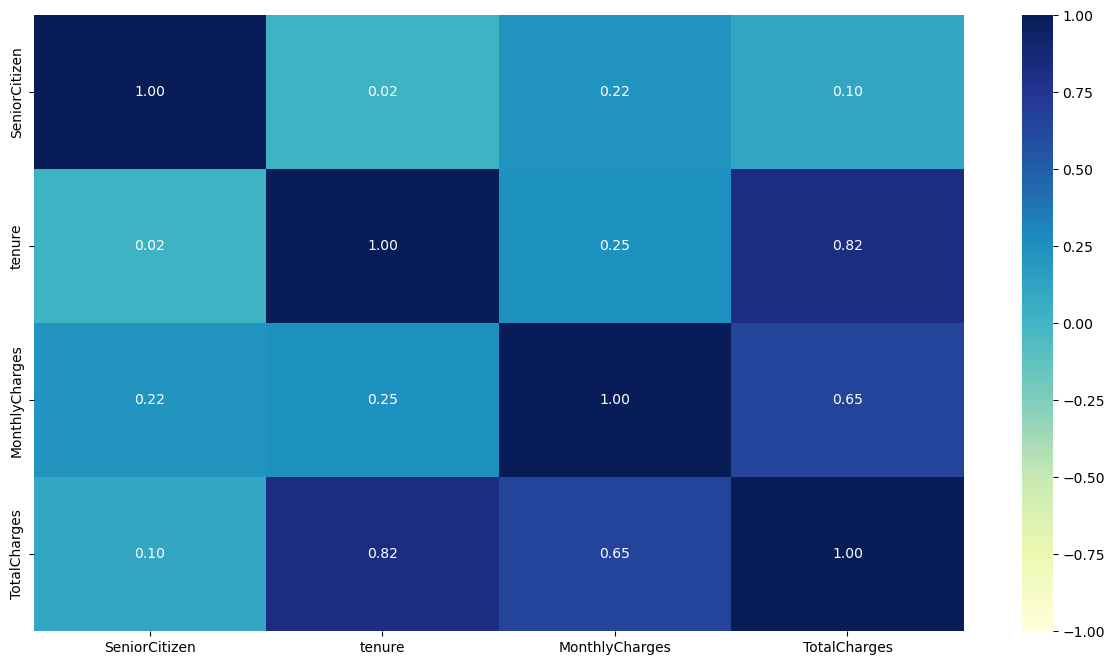

In [17]:
# heatmap
plt.figure(figsize=(15,8))
sns.heatmap(data[numerical_features].corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu', fmt='.2f')
plt.savefig('heatmap.png',bbox_inches='tight')
plt.show();

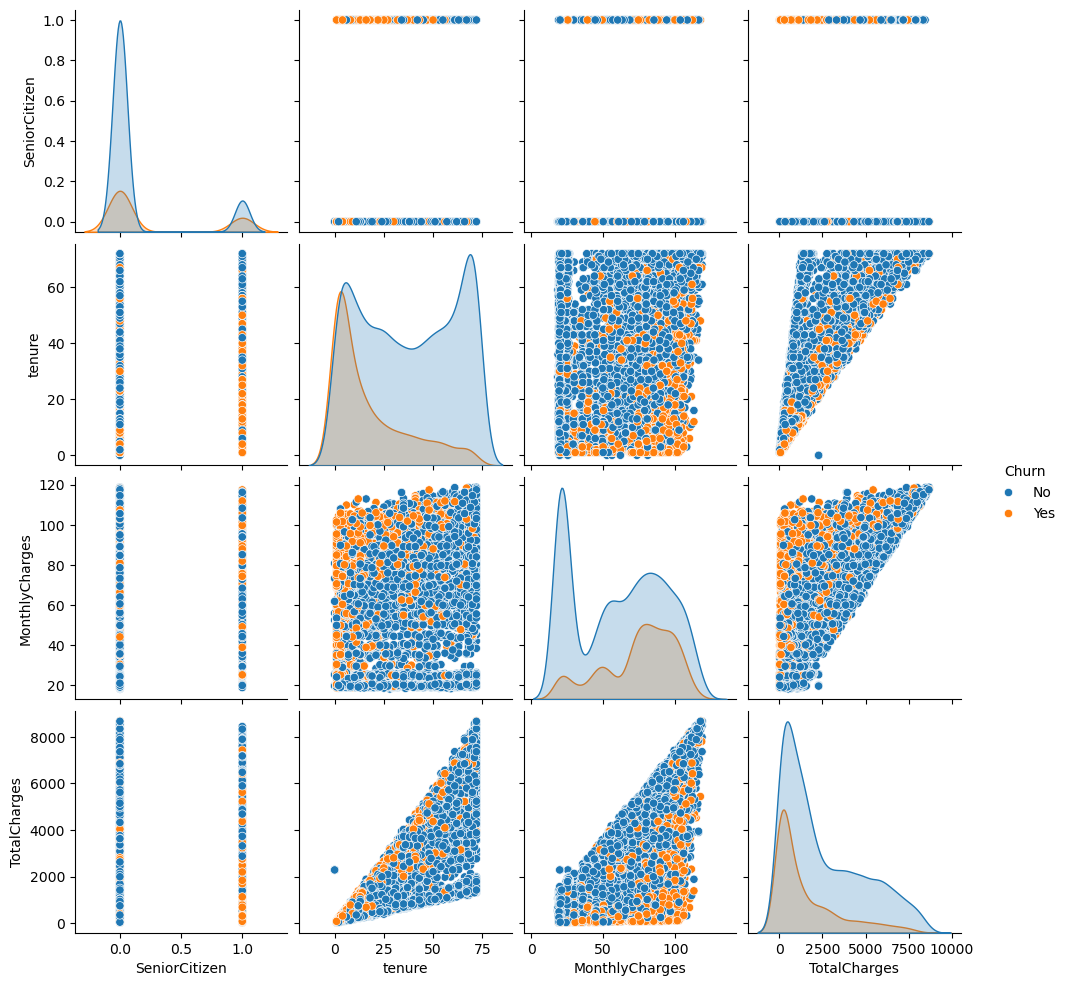

In [18]:
# pairplot
sns.pairplot(data=data, hue='Churn')
plt.savefig('pairplot.png', bbox_inches='tight')
plt.show();

# Feature Engineering

In [19]:
# one hot encoding the data
data_ohe = pd.get_dummies(data[categorical_features],drop_first=True, dtype=int)

# dropping the categorical features from the original dataset
data.drop(data[categorical_features], axis=1, inplace=True)

# combining the OHEdata and the original data
data = pd.concat([data, data_ohe], axis=1)
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,No,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,Yes,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,No,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,Yes,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [20]:
from sklearn.model_selection import train_test_split

# splitting the data into train and val set
x = data.drop('Churn', axis=1)
y = data['Churn']
x_train,x_val,y_train,y_val = train_test_split(x,y, test_size=0.4, random_state=1, stratify=y)

# further splitting the val data into val and test set
x_val,x_test,y_val,y_test = train_test_split(x_val,y_val, test_size=0.5, random_state=1, stratify=y_val)

In [21]:
print(f'The size of the train data is {x_train.shape}')
print(f'The size of the validation data is {x_val.shape}')
print(f'The size of the testing data is {x_test.shape}')

The size of the train data is (4225, 30)
The size of the validation data is (1409, 30)
The size of the testing data is (1409, 30)


In [22]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # instantiating the scaler

#scaling the training data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index) #converting the numpy array back to a dataframe

# scaling the validation data
x_val_scaled = scaler.transform(x_val)
x_val = pd.DataFrame(x_val_scaled, columns=x_val.columns, index=x_val.index) #converting the numpy array back to a dataframe

# scaling the testing data
x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index) #converting the numpy array back to a dataframe

In [29]:
# converting the dependent variable to integers
y_train = y_train.map({'No':0, 'Yes':1})
y_val = y_val.map({'No':0, 'Yes':1})
y_test = y_test.map({'No':0, 'Yes':1})

# Feature Selection

In [30]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [31]:
selection_model = SelectFromModel(Lasso(alpha=0.005, random_state=1))
selection_model.fit_transform(x_train,y_train) # fitting the model on the training data

array([[-0.43643578, -0.8676664 , -0.57413432, ..., -0.57288627,
         0.82700533,  1.41597269],
       [-0.43643578, -0.90831451, -0.81781378, ..., -0.57288627,
         0.82700533, -0.70622831],
       [-0.43643578, -0.98961073, -0.72372778, ..., -0.57288627,
         0.82700533,  1.41597269],
       ...,
       [-0.43643578,  1.44927593,  2.28829795, ...,  1.74554715,
         0.82700533, -0.70622831],
       [ 2.29128785, -0.78637018, -0.60643316, ..., -0.57288627,
         0.82700533,  1.41597269],
       [-0.43643578,  1.08344293,  1.82258868, ..., -0.57288627,
         0.82700533,  1.41597269]])

In [32]:
selected_features = x_train.columns[(selection_model.get_support())] #filtering the model to extract only the important features

In [33]:
print(x_train.shape[1]) # original number of features

30


In [34]:
len(selected_features)

20

In [35]:
print(np.sum(selection_model.estimator_.coef_ == 0)) # eliminated features having 0 coefficient values

8


In [36]:
selected_features

Index(['SeniorCitizen', 'tenure', 'TotalCharges', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check'],
      dtype='object')

In [37]:
# applying these features to all our datasets
x_train = x_train[selected_features]
x_val = x_val[selected_features]
x_test = x_test[selected_features]

# Model Building

### Pre-defined functions for model evaluation

In [38]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, classification_report, roc_curve

In [40]:
# pre-defined function for the confusion matrix
def cm(actual,predicted):
    cm1 = confusion_matrix(actual,predicted)
    custom_cm = pd.DataFrame([[cm1[1,1],cm1[1,0]],[cm1[0,1],cm1[0,0]]],columns=['Predicted Positive','Predicted Negative'],index=['Actual Positive','Actual Negative'])
    return custom_cm

In [42]:
# pre-defined fucntion to store the performance scores of the model
results=pd.DataFrame(columns=['Model','Score'])
def model_score(model,score):
    global results
    model_results = pd.DataFrame({'Model':[model],'Score':[score]})
    results = pd.concat([results, model_results], ignore_index=True)
    return results

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lg_model = LogisticRegression() # instantiating the model
lg_model.fit(x_train,y_train)

LogisticRegression()

#### validating model performance on training data

In [45]:
pred_train_lg = lg_model.predict(x_train)

In [46]:
cm(y_train, pred_train_lg)

,Predicted Positive,Predicted Negative
Actual Positive,606,515
Actual Negative,328,2776


In [47]:
print(classification_report(y_train,pred_train_lg))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      3104
           1       0.65      0.54      0.59      1121

    accuracy                           0.80      4225
   macro avg       0.75      0.72      0.73      4225
weighted avg       0.79      0.80      0.79      4225



#### validating model performance on validation data

In [49]:
pred_val_lg = lg_model.predict(x_val)

In [50]:
cm(y_val, pred_val_lg)

,Predicted Positive,Predicted Negative
Actual Positive,196,178
Actual Negative,98,937


In [51]:
print(classification_report(y_val, pred_val_lg))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.52      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [52]:
model_score('Logistic Regression', recall_score(y_val, pred_val_lg))

,Model,Score
0,Logistic Regression,0.524064


# Support Vector Machines

In [53]:
from sklearn import svm

In [54]:
svm = svm.SVC()
svm.fit(x_train,y_train)

SVC()

#### validating model performance on training data

In [55]:
pred_train_svm = svm.predict(x_train)

In [56]:
cm(y_train, pred_train_svm)

,Predicted Positive,Predicted Negative
Actual Positive,592,529
Actual Negative,266,2838


In [57]:
print(classification_report(y_train, pred_train_svm))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      3104
           1       0.69      0.53      0.60      1121

    accuracy                           0.81      4225
   macro avg       0.77      0.72      0.74      4225
weighted avg       0.80      0.81      0.80      4225



#### validating model performance on validation data

In [58]:
pred_val_svm = svm.predict(x_val)

In [59]:
cm(y_val, pred_val_svm)

,Predicted Positive,Predicted Negative
Actual Positive,189,185
Actual Negative,86,949


In [61]:
print(classification_report(y_val, pred_val_svm))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1035
           1       0.69      0.51      0.58       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



# Random Forest

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf_model = RandomForestClassifier()
param_dist = {'n_estimators':np.arange(50,450,50),
              'max_depth':np.arange(1,8,1),
              'min_samples_leaf':np.arange(1,10,1),
              'min_samples_split':np.arange(1,10,1),
              'max_features':np.arange(0.1,0.8,0.1)}
scorer = make_scorer(recall_score)
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist, cv=5, scoring=scorer, random_state=1, n_iter=50)
random_search_rf.fit(x_train,y_train)
best_model_rf = random_search_rf.best_estimator_
best_model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, max_features=0.6, min_samples_leaf=7,
                       min_samples_split=6)

#### validating the model performance on the validation data

In [81]:
pred_val_rf = best_model_rf.predict(x_val)

In [82]:
cm(y_val, pred_val_rf)

,Predicted Positive,Predicted Negative
Actual Positive,190,184
Actual Negative,81,954


In [83]:
print(classification_report(y_val, pred_val_rf))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1035
           1       0.70      0.51      0.59       374

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



# XGBoost

In [87]:
y.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [84]:
from xgboost import XGBClassifier

In [95]:
scale_pos_weight = 5174/1869
scale_pos_weight

2.7683253076511503

In [104]:
# scale_pos_weight = (number of negative samples) / (number of positive samples)

xgb = XGBClassifier(scale_pos_weight=2.5)
param_dist = {'n_estimators':np.arange(50,450,50),
              'learning_rate':[0.001, 0.01, 0.1],
              'max_depth':np.arange(1,8,1),
              'min_child_weight':np.arange(1,8,1),
              'gamma':np.arange(0.1,0.8,0.1),
              'colsample_bytree':np.arange(0.1,1,0.1),
              'reg_alpha':np.arange(0,0.1,0.05),
              'reg_lambda':np.arange(0.1,1,0.1)}
scorer = make_scorer(recall_score)
random_search_xgb = RandomizedSearchCV(xgb, param_distributions=param_dist, cv=5, n_iter=50,random_state=1, scoring=scorer)
random_search_xgb.fit(x_train, y_train)
best_model_xgb = random_search_xgb.best_estimator_
best_model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, ...)

#### validating the model performance on the validation data

In [105]:
pred_val_xgb = best_model_xgb.predict(x_val)

In [106]:
cm(y_val, pred_val_xgb)

,Predicted Positive,Predicted Negative
Actual Positive,297,77
Actual Negative,289,746


In [107]:
print(classification_report(y_val, pred_val_xgb))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



# Predicting on the test data using XGB Classifier

In [108]:
pred_test = best_model_xgb.predict(x_test)

In [109]:
cm(y_test,pred_test)

,Predicted Positive,Predicted Negative
Actual Positive,312,62
Actual Negative,290,745


In [110]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1035
           1       0.52      0.83      0.64       374

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.82      0.75      0.76      1409



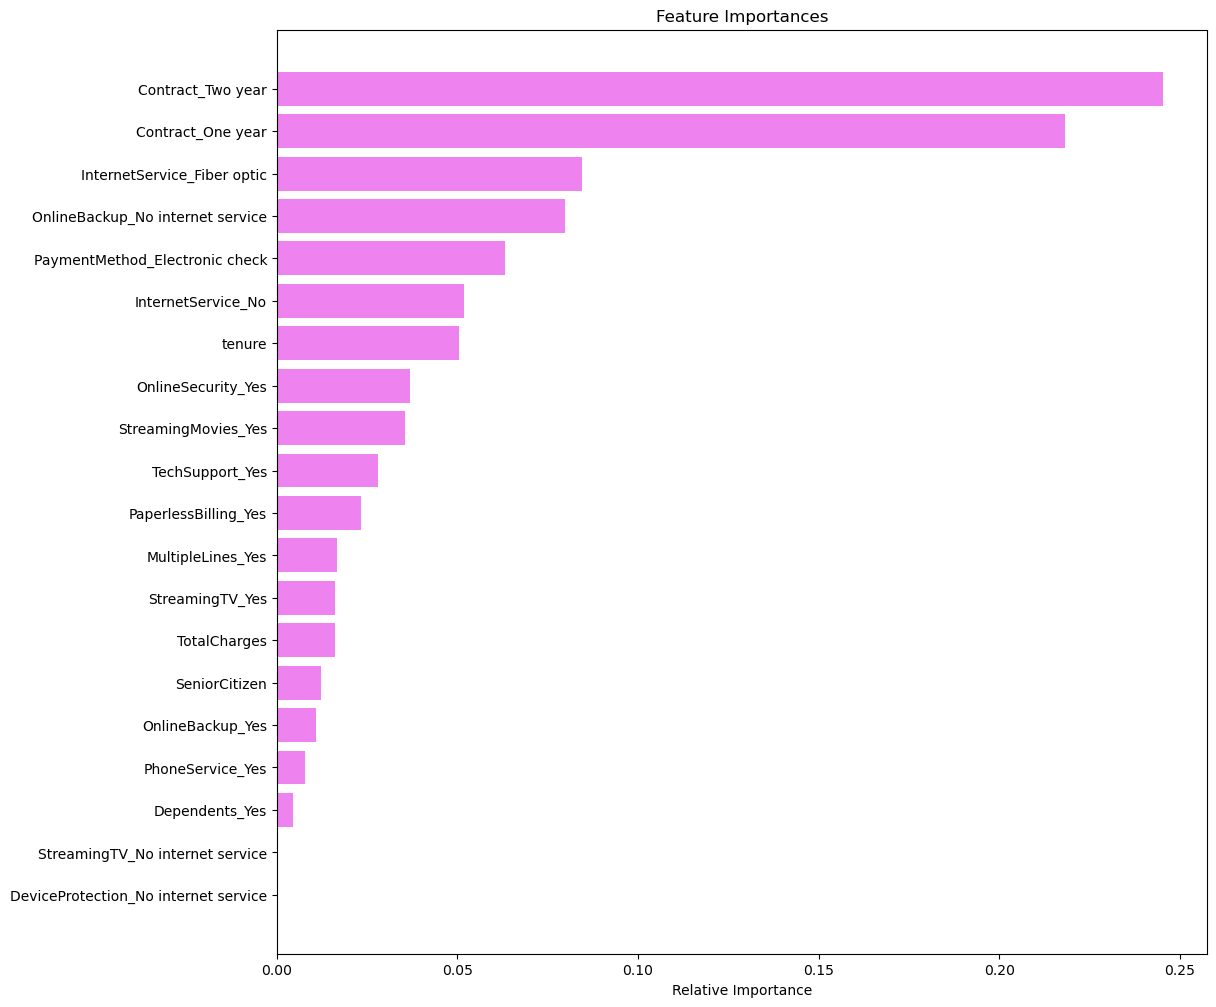

In [111]:
feature_names = x_test.columns
importances = best_model_xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.savefig('feature_importances.png',bbox_inches='tight')
plt.show()